In [1]:
env = gym.make('MountainCar-v0')
env.reset()

array([-0.49920006,  0.        ])

In [0]:
# Import and initialize Mountain Car Environment
env = gym.make('MountainCar-v0')
env.reset()
episode = []
# Define Q-learning function
def QLearning(env, learning, discount, epsilon, min_eps, episodes):
    # Determine size of discretized state space
    num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 130])
    num_states = np.round(num_states, 0).astype(int) + 1
    
    # Initialize Q table
    Q = np.random.uniform(low = -1, high = 1, 
                          size = (num_states[0], num_states[1], 
                                  env.action_space.n))
    
    # Initialize variables to track rewards
    reward_list = []
    ave_reward_list = []
    
    # Calculate episodic reduction in epsilon
    reduction = (epsilon - min_eps)/episodes
    
    # Run Q learning algorithm
    for i in range(episodes):
        # Initialize parameters
        done = False
        tot_reward, reward = 0,0
        state = env.reset()
        
        # Discretize state
        state_adj = (state - env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
    
        while done != True:   
            # Render environment for last five episodes
                
            # Determine next action - epsilon greedy strategy
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]]) 
            else:
                action = np.random.randint(0, env.action_space.n)
                
            # Get next state and reward
            state2, reward, done, info = env.step(action) 
            
            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 130])
            state2_adj = np.round(state2_adj, 0).astype(int)
            
            #Allow for terminal states
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward
                
            # Adjust Q value for current state
            else:
                delta = learning*(reward + 
                                 discount*np.max(Q[state2_adj[0], 
                                                   state2_adj[1]]) - 
                                 Q[state_adj[0], state_adj[1],action])
                Q[state_adj[0], state_adj[1],action] += delta
                                     
            # Update variables
            tot_reward += reward
            state_adj = state2_adj
            
        # Decay epsilon
        if epsilon > min_eps:
            epsilon -= reduction
        
        # Track rewards
        reward_list.append(tot_reward)

        if (i+1) % 10 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []

        if (i+1) % 5000 == 0:    
            print('Episode {} Average Reward: {}'.format(i+1, ave_reward))
            episode.append(50*i)
    env.close()
    avg_score = np.mean(ave_reward_list[-100:])
    return avg_score, ave_reward_list, Q

# Run Q-learning algorithm

#rewards, Q = QLearning(env, 0.2, 0.9, 0.9, 0, 15000)

In [4]:
rewards, Q = QLearning(env, 0.1, 0.95, 0.95, 0, 50000)

Episode 5000 Average Reward: -200.0
Episode 10000 Average Reward: -200.0
Episode 15000 Average Reward: -200.0
Episode 20000 Average Reward: -200.0
Episode 25000 Average Reward: -200.0
Episode 30000 Average Reward: -200.0
Episode 35000 Average Reward: -189.4
Episode 40000 Average Reward: -174.4
Episode 45000 Average Reward: -159.5
Episode 50000 Average Reward: -135.9


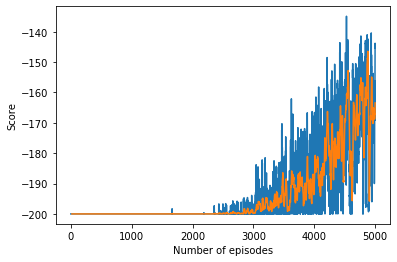

In [45]:
def plot_scores(scores, rolling_window=20):
    """Plot scores and optional rolling mean using specified window."""
    plt.plot(scores); plt.title("");
    rolling_mean = pd.Series(scores).rolling(rolling_window).mean()
    plt.plot(rolling_mean);
    plt.ylabel('Score')
    plt.xlabel('Number of episodes')
    return rolling_mean

rolling_mean = plot_scores(rewards)
plt.show()
plt.close() 

19
19
19
19


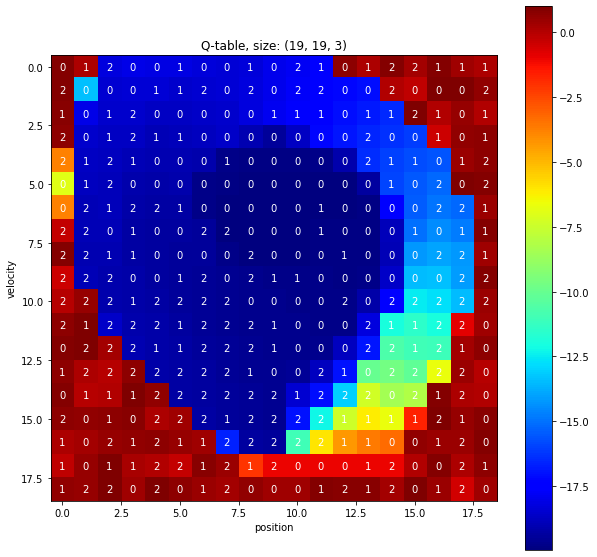

In [6]:
def plot_q_table(q_table): 
    """Visualize max Q-value for each state and corresponding action."""
    q_image = np.max(q_table, axis=2)       # max Q-value for each state
    q_actions = np.argmax(q_table, axis=2)  # best action for each state

    fig, ax = plt.subplots(figsize=(10, 10))
    cax = ax.imshow(q_image, cmap='jet');
    cbar = fig.colorbar(cax)
    for x in range(q_image.shape[0]):
        for y in range(q_image.shape[1]):
            ax.text(x, y, q_actions[x, y], color='white',
                    horizontalalignment='center', verticalalignment='center')
    ax.grid(False)
    ax.set_title("Q-table, size: {}".format(q_table.shape))
    ax.set_xlabel('position')
    ax.set_ylabel('velocity')
    print(q_table.shape[0])
    print(q_image.shape[0])
    print(q_table.shape[1])
    print(q_image.shape[1])


plot_q_table(Q)

19
19
19
19


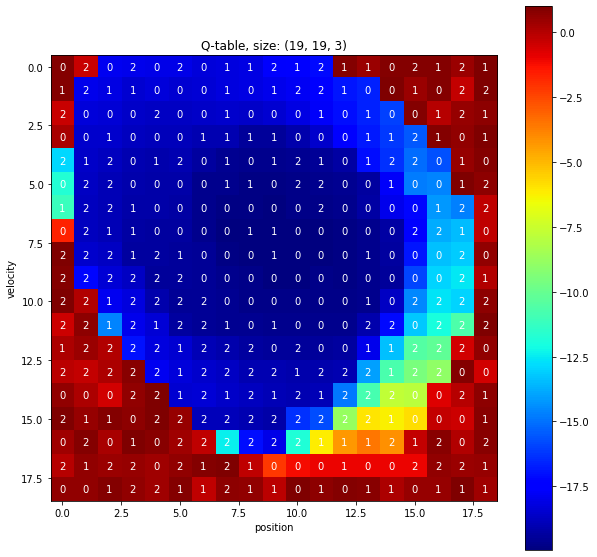

In [20]:
plot_q_table(Q)

In [0]:
def QLearning1(env, learning, discount, epsilon, min_eps, episodes): 
    # Determine size of discretized state space
    num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array([100, 1300])
    num_states = np.round(num_states, 0).astype(int) + 1
    
    # Initialize Q table
    Q = np.random.uniform(low = -1, high = 1, 
                          size = (num_states[0], num_states[1], 
                                  env.action_space.n))
    
    # Initialize variables to track rewards
    reward_list = []
    ave_reward_list = []
    
    # Calculate episodic reduction in epsilon
    reduction = (epsilon - min_eps)/episodes
    
    # Run Q learning algorithm
    for i in range(episodes):
        # Initialize parameters
        done = False
        tot_reward, reward = 0,0
        state = env.reset()
        
        # Discretize state
        state_adj = (state - env.observation_space.low)*np.array([100, 1000])
        state_adj = np.round(state_adj, 0).astype(int)
    
        while done != True:   
            # Render environment for last five episodes
                
            # Determine next action - epsilon greedy strategy
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]]) 
            else:
                action = np.random.randint(0, env.action_space.n)
                
            # Get next state and reward
            state2, reward, done, info = env.step(action) 
            
            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array([100, 1300])
            state2_adj = np.round(state2_adj, 0).astype(int)
            
            #Allow for terminal states
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward
                
            # Adjust Q value for current state
            else:
                delta = learning*(reward + 
                                 discount*np.max(Q[state2_adj[0], 
                                                   state2_adj[1]]) - 
                                 Q[state_adj[0], state_adj[1],action])
                Q[state_adj[0], state_adj[1],action] += delta
                                     
            # Update variables
            tot_reward += reward
            state_adj = state2_adj
            
        # Decay epsilon
        if epsilon > min_eps:
            epsilon -= reduction
        
        # Track rewards
        reward_list.append(tot_reward)

        if (i+1) % 10 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []

        if (i+1) % 5000 == 0:    
            print('Episode {} Average Reward: {}'.format(i+1, ave_reward))
            episode.append(50*i)
    env.close()
    avg_score = np.mean(ave_reward_list[-100:])
    return avg_score, ave_reward_list, Q

In [29]:
rewards_2, score_2, Q1 = QLearning1(env, 0.1, 0.95, 0.95, 0, 500000)

Episode 5000 Average Reward: -200.0
Episode 10000 Average Reward: -200.0
Episode 15000 Average Reward: -200.0
Episode 20000 Average Reward: -200.0
Episode 25000 Average Reward: -200.0
Episode 30000 Average Reward: -200.0
Episode 35000 Average Reward: -200.0
Episode 40000 Average Reward: -200.0
Episode 45000 Average Reward: -200.0
Episode 50000 Average Reward: -200.0
Episode 55000 Average Reward: -200.0
Episode 60000 Average Reward: -200.0
Episode 65000 Average Reward: -200.0
Episode 70000 Average Reward: -200.0
Episode 75000 Average Reward: -200.0
Episode 80000 Average Reward: -200.0
Episode 85000 Average Reward: -200.0
Episode 90000 Average Reward: -200.0
Episode 95000 Average Reward: -200.0
Episode 100000 Average Reward: -200.0
Episode 105000 Average Reward: -200.0
Episode 110000 Average Reward: -200.0
Episode 115000 Average Reward: -200.0
Episode 120000 Average Reward: -200.0
Episode 125000 Average Reward: -200.0
Episode 130000 Average Reward: -200.0
Episode 135000 Average Reward: -

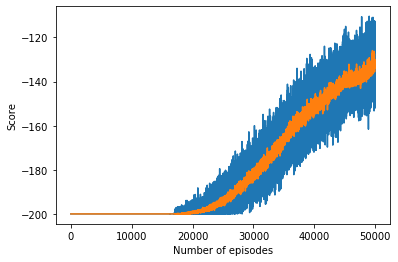

In [46]:
rolling_mean = plot_scores(score_2)
plt.show()
plt.close() 

181
181
183
183


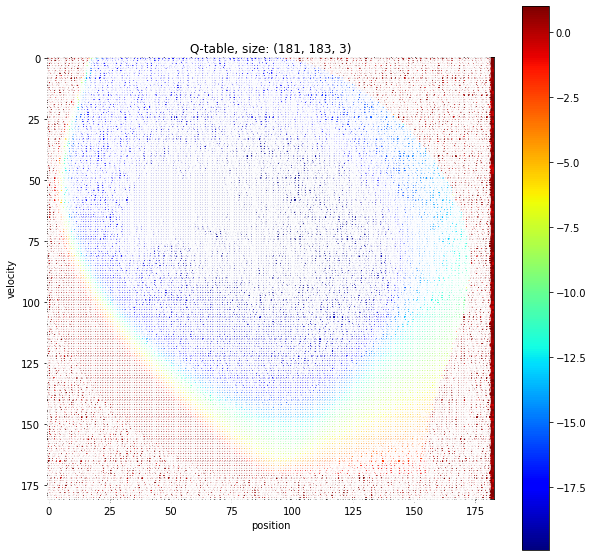

In [47]:
plot_q_table(Q1)

In [0]:
def QLearning2(env, learning, discount, epsilon, min_eps, episodes):
    # Determine size of discretized state space
    num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 130])
    num_states = np.round(num_states, 0).astype(int) + 1
    
    # Initialize Q table
    Q = np.random.uniform(low = -1, high = 1, 
                          size = (num_states[0], num_states[1], 
                                  env.action_space.n))
    
    # Initialize variables to track rewards
    reward_list = []
    ave_reward_list = []
    
    # Calculate episodic reduction in epsilon
    reduction = (epsilon - min_eps)/episodes
    
    # Run Q learning algorithm
    for i in range(episodes):
        # Initialize parameters
        done = False
        tot_reward, reward = 0,0
        state = env.reset()
        
        env._max_episode_steps = 400

        # Discretize state
        state_adj = (state - env.observation_space.low)*np.array([10, 130])
        state_adj = np.round(state_adj, 0).astype(int)
    
        while done != True:   
            # Render environment for last five episodes
                
            # Determine next action - epsilon greedy strategy
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]]) 
            else:
                action = np.random.randint(0, env.action_space.n)
                
            # Get next state and reward
            state2, reward, done, info = env.step(action) 
            
            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 130])
            state2_adj = np.round(state2_adj, 0).astype(int)
            
            #Allow for terminal states
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward
                
            # Adjust Q value for current state
            else:
                delta = learning*(reward + 
                                 discount*np.max(Q[state2_adj[0], 
                                                   state2_adj[1]]) - 
                                 Q[state_adj[0], state_adj[1],action])
                Q[state_adj[0], state_adj[1],action] += delta
                                     
            # Update variables
            tot_reward += reward
            state_adj = state2_adj
            
        # Decay epsilon
        if epsilon > min_eps:
            epsilon -= reduction
        
        # Track rewards
        reward_list.append(tot_reward)

        if (i+1) % 10 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []

        if (i+1) % 1000 == 0:    
            print('Episode {} Average Reward: {}'.format(i+1, ave_reward))
            episode.append(50*i)
    env.close()
    avg_score = np.mean(ave_reward_list[-100:])
    return avg_score, ave_reward_list, Q

In [57]:
rewards_3, score_3, Q2 = QLearning2(env, 0.05, 0.95, 0.95, 0, 50000)

Episode 1000 Average Reward: -400.0
Episode 2000 Average Reward: -400.0
Episode 3000 Average Reward: -400.0
Episode 4000 Average Reward: -400.0
Episode 5000 Average Reward: -400.0
Episode 6000 Average Reward: -400.0
Episode 7000 Average Reward: -389.4
Episode 8000 Average Reward: -400.0
Episode 9000 Average Reward: -400.0
Episode 10000 Average Reward: -400.0
Episode 11000 Average Reward: -399.0
Episode 12000 Average Reward: -397.5
Episode 13000 Average Reward: -387.5
Episode 14000 Average Reward: -372.3
Episode 15000 Average Reward: -372.4
Episode 16000 Average Reward: -367.8
Episode 17000 Average Reward: -350.8
Episode 18000 Average Reward: -358.3
Episode 19000 Average Reward: -366.3
Episode 20000 Average Reward: -334.6
Episode 21000 Average Reward: -347.0
Episode 22000 Average Reward: -298.1
Episode 23000 Average Reward: -284.9
Episode 24000 Average Reward: -287.5
Episode 25000 Average Reward: -239.7
Episode 26000 Average Reward: -265.1
Episode 27000 Average Reward: -255.8
Episode 28

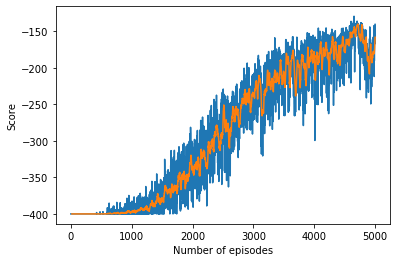

In [61]:
rolling_mean = plot_scores(score_3)
plt.show()
plt.close() 

19
19
19
19


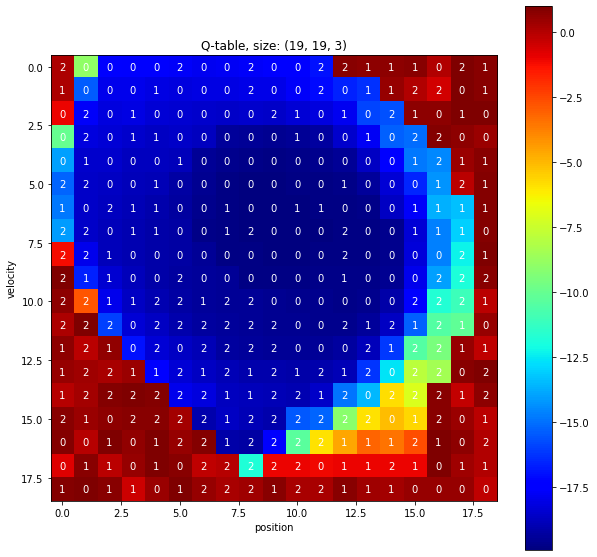

In [62]:
plot_q_table(Q2)

In [63]:
rewards_4, score_4, Q3 = QLearning2(env, 0.15, 0.95, 0.95, 0, 100000)

Episode 1000 Average Reward: -400.0
Episode 2000 Average Reward: -400.0
Episode 3000 Average Reward: -400.0
Episode 4000 Average Reward: -400.0
Episode 5000 Average Reward: -400.0
Episode 6000 Average Reward: -400.0
Episode 7000 Average Reward: -400.0
Episode 8000 Average Reward: -400.0
Episode 9000 Average Reward: -400.0
Episode 10000 Average Reward: -400.0
Episode 11000 Average Reward: -400.0
Episode 12000 Average Reward: -400.0
Episode 13000 Average Reward: -400.0
Episode 14000 Average Reward: -400.0
Episode 15000 Average Reward: -400.0
Episode 16000 Average Reward: -400.0
Episode 17000 Average Reward: -400.0
Episode 18000 Average Reward: -400.0
Episode 19000 Average Reward: -400.0
Episode 20000 Average Reward: -400.0
Episode 21000 Average Reward: -400.0
Episode 22000 Average Reward: -400.0
Episode 23000 Average Reward: -400.0
Episode 24000 Average Reward: -400.0
Episode 25000 Average Reward: -400.0
Episode 26000 Average Reward: -400.0
Episode 27000 Average Reward: -400.0
Episode 28

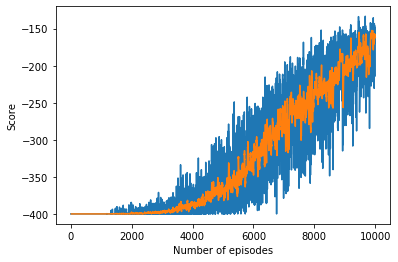

In [64]:
rolling_mean = plot_scores(score_4)
plt.show()
plt.close() 

19
19
19
19


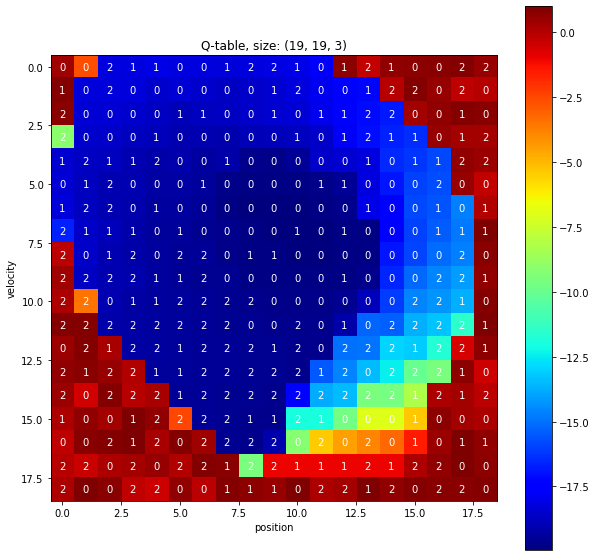

In [65]:
plot_q_table(Q3)